./sampler_result/fiducial/chain_FOLPS_RSD_V100_z1.0.npy
[000000.06] [0/1] 10-21 14:39  Chain                     INFO     Loading ./sampler_result/fiducial/chain_FOLPS_RSD_V100_z1.0.npy.
./sampler_result/fiducial/chain_FOLPS_LRG_V100_z1.0.npy
[000000.21] [0/1] 10-21 14:39  Chain                     INFO     Loading ./sampler_result/fiducial/chain_FOLPS_LRG_V100_z1.0.npy.
./sampler_result/fiducial/chain_FOLPS_QSO_V100_z1.0.npy
[000000.30] [0/1] 10-21 14:39  Chain                     INFO     Loading ./sampler_result/fiducial/chain_FOLPS_QSO_V100_z1.0.npy.
Removed no burn in
Removed no burn in
Removed no burn in


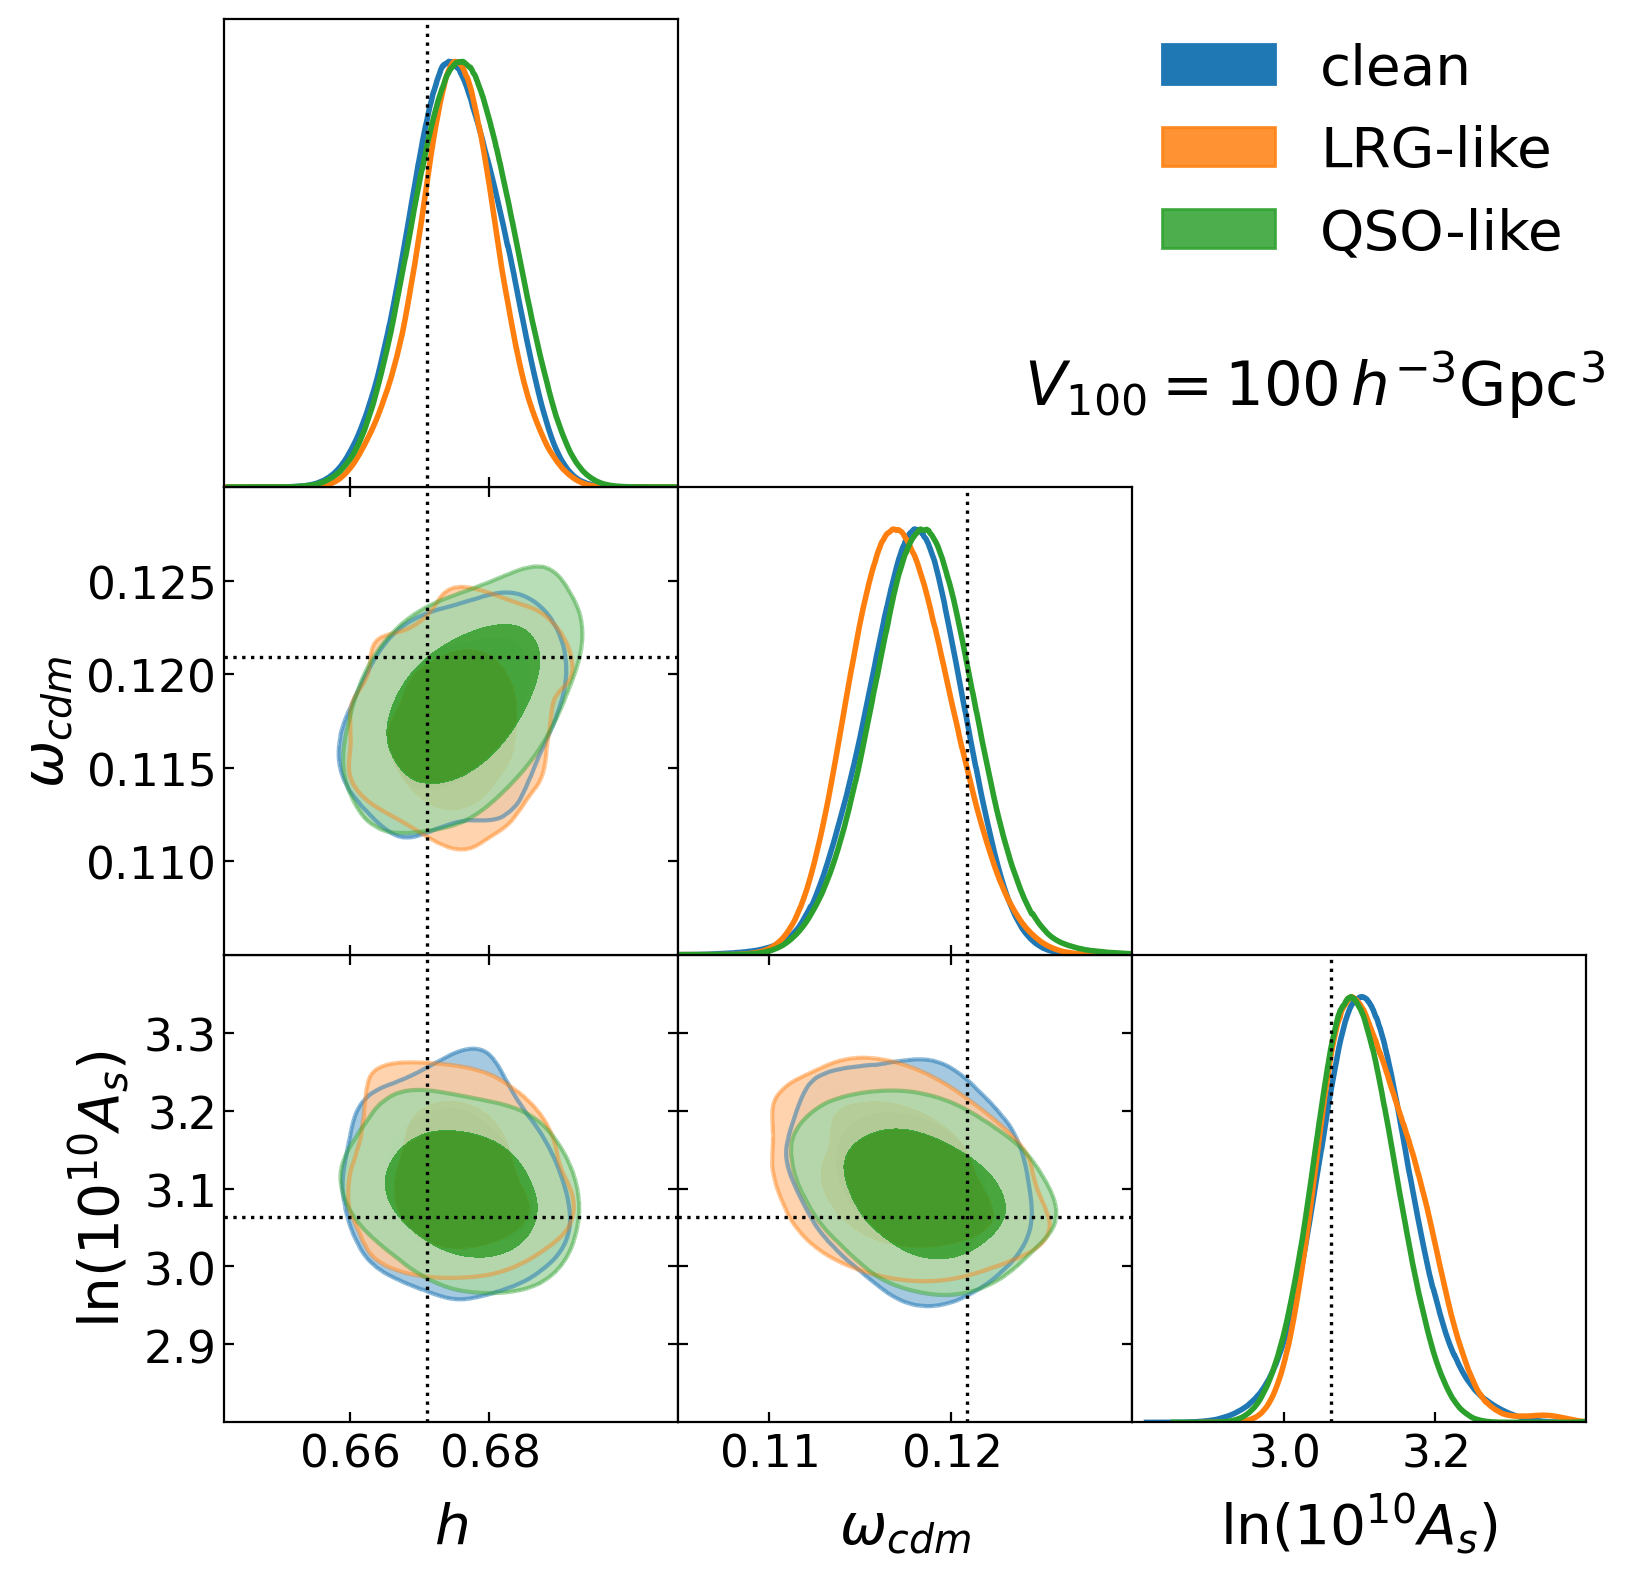

In [2]:
import numpy as np
import matplotlib
import matplotlib.gridspec as gridspec
from matplotlib import pyplot as plt
from getdist import plots
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
from cosmoprimo.fiducial import DESI
from desilike.observables.galaxy_clustering import TracerPowerSpectrumMultipolesObservable
from desilike.likelihoods import ObservablesGaussianLikelihood
from desilike.samples import Profiles, plotting, Chain
from desilike import setup_logging
setup_logging()  # for logging messages

redshift = 1.0
catalogue = 'fiducial'
cosmology = 'fiducial'
model = 'FOLPS'
CovRsf = 100
r_pks = ['RSD','LRG','QSO']
params= ['h', 'omega_cdm', 'logA']
# params= ['h', 'omega_cdm', 'logA'] + ['b1', 'b2', 'bs', 'alpha0', 'alpha2', 'sn0', 'sn2']

if cosmology == 'fiducial':
    param_limits = None
    # param_limits = {'h':[0.632,0.725],'omega_cdm':[0.101,0.134],'omega_b':[0.0206,0.0244],'logA':[2.66,3.8]}
    # param_limits = {'h':[0.642,0.707],'omega_cdm':[0.105,0.13],'logA':[2.76,3.4]}
    if CovRsf ==25:
        param_limits = {'h':[0.632,0.722],'omega_cdm':[0.10,0.135],'logA':[2.6,3.6]}
    if CovRsf ==100:
        param_limits = {'h':[0.642,0.707],'omega_cdm':[0.105,0.13],'logA':[2.8,3.4]}
    legend_fontsize = 30
    colors      = ['C0', 'C1', 'C2']
    lss          = ['-', '-', '-']
    filleds      = [True, True, True]
elif cosmology == 'Mnu_p':
    params = ['m_ncdm']+params
    param_limits = {'h':[0.638,0.70],'omega_cdm':[0.105,0.134],'omega_b':[0.0206,0.0244],'logA':[2.86,3.6], 'm_ncdm':[0,0.58]}
    legend_fontsize = 20
    colors      = ['C6', 'C1', 'C5']
elif cosmology == 'nsCDM':
    params = ['n_s']+params
    param_limits = {'h':[0.648,0.70],'omega_cdm':[0.095,0.134],'logA':[2.8,3.47]}
    colors      = ['C8', 'C1', 'C5']
elif cosmology == 'wCDM':
    params = ['w0_fld']+params
    param_limits = {'h':[0.58,0.74],'omega_cdm':[0.108,0.127],'logA':[2.68,3.68], 'w0_fld':[-1.32,-0.6]}
    colors      = ['C9', 'C1', 'C5']

lss         = ['-', '-', '-']
filleds     = [True, True, True]
lws         = [2.0, 2.0, 2.0]

burnin      = 0.6
slice_step  = 1500
for redshift in [1.0]:
    samples = []
    for r_pk in r_pks:
        chain_fn    = f'./sampler_result/{cosmology}/chain_{model}_{r_pk}_V{CovRsf}_z{redshift}.npy'
        print(chain_fn)
        chain       = Chain.load(chain_fn).remove_burnin(burnin)[::slice_step]
        # print(chain.to_stats(tablefmt='pretty'))
        samples.append(chain)

g = plots.get_subplot_plotter()
g.settings.fig_width_inch= 8
g.settings.legend_fontsize = 22
g.settings.axes_labelsize = 22
g.settings.axes_fontsize = 18
g.settings.figure_legend_frame = False

def plot_nuiparams():
    if model == 'FOLPS':
        extra_param = ['alpha2','sn2']
        g.settings.fig_width_inch= 6
    elif model == 'TNS':
        extra_param = ['sigmav']
        
    plotting.plot_triangle(samples, params= extra_param, title_limit=0, filled = filleds, legend_loc = 'upper right',                        
                        # legend_labels = [r'clean', r'LRG-like ', r'QSO-like'],
                        legend_labels = [r'clean', r'LRG-like', r'QSO-like'],
                        contour_ls = lss, contour_lws = lws, contour_colors = colors, 
                        smoothed=True, g=g)

def plot_cosparams():
    g.settings.fig_width_inch= 8
    plotting.plot_triangle(samples, params = params, title_limit=0, filled = filleds, legend_loc = 'upper right',
                            legend_labels = [r'clean', r'LRG-like', r'QSO-like'],
                                contour_ls = lss, contour_lws = lws, contour_colors = colors, 
                                param_limits=param_limits, 
                                smoothed=True, g=g)

    def set_true_values(catalogue, params):
        update_values = {
            'fiducial': {'h': 0.6711, 'omega_cdm': 0.1209, 'Omega_cdm': 0.2685, 'omega_b':0.02207,'logA': 3.0631, 'm_ncdm': 0.0, 'n_s':0.9624, 'w0_fld':-1.0},
            'Mnu_p': {'h': 0.6711, 'omega_cdm': 0.1198, 'Omega_cdm': 0.2661, 'omega_b':0.02207,'logA': 3.1247, 'm_ncdm': 0.1, 'n_s':0.9624, 'w0_fld':-1.0},
            'Mnu_ppp': {'h': 0.6711, 'omega_cdm': 0.1166, 'Omega_cdm': 0.2590, 'omega_b':0.02207,'logA': 3.3113, 'm_ncdm': 0.4, 'n_s':0.9624, 'w0_fld':-1.0}
        }
        if catalogue in update_values:
            truth_values = update_values[catalogue]
        return [truth_values[param] for param in params if param in truth_values]
    true_values = set_true_values(catalogue, params)
    for i in range(len(true_values)):
        for j in range(i+1):
            g.subplots[i,j].axvline(true_values[j], c = 'k', ls = ':', lw = 1.2)
            if i != j : g.subplots[i,j].axhline(true_values[i], c = 'k', ls = ':', lw = 1.2)
plot_cosparams()
plt.figtext(0.63, 0.74, r'$V_{100} = 100 \, h^{-3} \rm{Gpc}^3$', fontsize=22)
g.export(dpi=600)

[000267.49] [0/1] 10-14 17:25  Chain                     INFO     Loading ./sampler_result/fiducial/chain_FOLPS_RSD_V100_z1.0.npy.


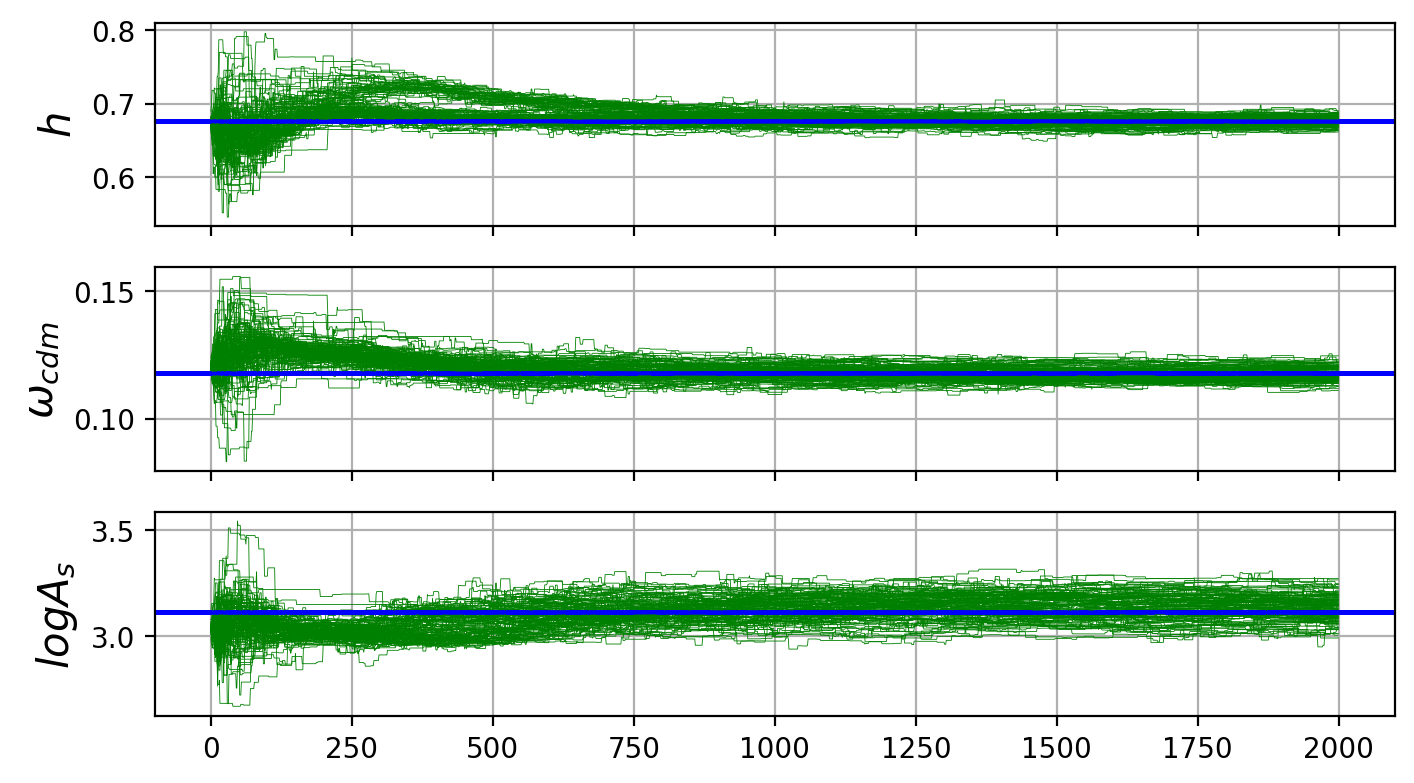

In [12]:
import numpy as np

redshift =1.0
catalogue = 'fiducial'
model = 'FOLPS'
r_pk = 'RSD'
CovRsf = 100
params= ['h', 'omega_cdm', 'logA']
if catalogue == 'Mnu_p':
    params = ['m_ncdm']+params
ndim        = len(params)
burnin      = 0.0
slice_step  = 1

params_name = [r'$h$', r'$\omega_{cdm}$', r'$logA_s$']
nwalkers = 120

chain_fn    = f'./sampler_result/{catalogue}/chain_{model}_{r_pk}_V{CovRsf}_z{redshift}.npy'
chain       = Chain.load(chain_fn).remove_burnin(burnin)[::slice_step]
chain_samples   = dict(zip(chain.basenames(), chain.data))
samples         = np.array([chain_samples[p] for p in params])
medians         = np.array(chain.median(params=params))
fig, ax = plt.subplots(ndim, sharex=True, figsize=(8, 1.5 * ndim))
for i in range(nwalkers):
    for j in range(ndim):
        ax[j].plot(samples[j, :2000, i], c = 'green', lw=0.3)
        ax[j].set_ylabel(params_name[j], fontsize=15)
        ax[j].grid(True)
        ax[j].axhline(medians[j], c='blue', lw=1.2)